# I. Introduction

This dataset contains information on homes for sale in San Fransisco that, was scraped from the Zillow website. 

The purpose of this analysis is to explore how different home features influence the price of a home as well see any trends about the real estate market in San Francisco with the given data. 

# II. Data Information

In [1]:
# data munging 
import pandas as pd
import numpy as np

# visualization
import plotnine as p9
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
for_sale = pd.read_csv('for_sale.csv', index_col = [0])
for_sale.head()

,address,zip,building_type,price,beds,baths,sqft,price/sqft,agent,brokerage
0,710 London St,94112,- House for sale,1498000,4,3,2047,731.802638,Darin J. Holwitz,COMPASS
1,655 27th St,94131,- House for sale,2195000,3,3,1791,1225.572306,Dale T. Boutiette,COMPASS SF
2,270 Sadowa St,94112,- House for sale,1049000,3,2,1264,829.905063,Cynthia M. Pagan,PACIFIC EDGE
3,437 Valley St,94131,- House for sale,2000000,3,2,1949,1026.167265,Allison Fortini Crawford,SOTHEBY'S INTERNATIONAL REALTY
4,585 Rockdale Dr,94127,- House for sale,1295000,2,1,1152,1124.131944,Edward O'Connell,CORCORAN GLOBAL LIVING


#### Columns

Looking at the head of the data, we have the following columns: 

address: street address.

zip: zip code. 

building_type: selection from condo, house, multi-family, new construction, lot/land, foreclosure, townhouse.

price: zillow estimate.

beds: # of beds.

baths: # of baths.

sqft: # of sqft.

price/sqft: price per sqft.

agent: listing agent name.

brokerage: brokerage name.

#### Column Data Types

In [3]:
for_sale.dtypes

address           object
zip               object
building_type     object
price              int64
beds              object
baths             object
sqft               int64
price/sqft       float64
agent             object
brokerage         object
dtype: object

Looking at the data types, it seems like I have to change the data type of beds and baths to integers. 

#### Percent Of Missing Data


When looking at the data, I noticed that some values are zero, we will replace these with NAN. These zeros are located in almost every column. 

In [4]:
# Replacing zeros with NAN and 

cols= ['address','zip','building_type','price','beds','baths','sqft','price/sqft','agent','brokerage']
for_sale[cols]= for_sale[cols].replace(['0',0], np.nan)

In [5]:
# percentage of missing data

round((for_sale.isnull().mean()*100),2).astype(str)+'%'

address            0.0%
zip                0.0%
building_type      0.0%
price              0.0%
beds               0.0%
baths             0.75%
sqft               9.5%
price/sqft         0.0%
agent             16.0%
brokerage        13.88%
dtype: object

# III. Data Cleaning

In this step, we begin cleaning the data. This includes checking for and removing duplicate rows, removing unwanted strings in our data, and changing the data types of some of the columns. We are also checking to see if this scraped data has the correct items of interest in each column. 

In [6]:
# drop all rows with NAN

for_sale = for_sale.dropna()

In [7]:
# Dropping duplic rows (basically ones with the same address)

for_sale = for_sale.drop_duplicates(subset='address', keep='first')

Looking at the data now, I can see that for condos that are studios, they are sometimes not given a bed/bath amount. These rows have 'studio' as their # of beds. I will put this data in a separate dataframe to analyze later.  

In [8]:
# dataframe of studios 

studios = for_sale[for_sale['beds']== 'Studio']

In [9]:
# dataframe with studios removed

for_sale = for_sale[~(for_sale['beds'] == 'Studio')]

In [10]:
# removing rows containing '--' found in beds ands baths 
for_sale = for_sale[~for_sale['beds'].str.contains('--')]
for_sale = for_sale[~for_sale['baths'].str.contains('--')]

In [11]:
for_sale.dtypes

address           object
zip               object
building_type     object
price              int64
beds              object
baths             object
sqft             float64
price/sqft       float64
agent             object
brokerage         object
dtype: object

In [12]:
for_sale= for_sale.astype({'address': str, 'zip':str, 'building_type':str, 'price':int, 'beds': int, 'baths':int,
                           'sqft':int, 'price/sqft':int, 'agent':str, 'brokerage':str})

In [13]:
# building types pre cleaning

for_sale['building_type'].value_counts()

- Condo for sale                285
- House for sale                148
- Multi-family home for sale     56
- New construction               55
- Townhouse for sale              3
Name: building_type, dtype: int64

I printed the value counts for the building type column in order to see if there was a consistent naming convetion. We can now see that there are 7 options that a property can be described as. However, I would like to remove the '-' and the 'for sale' portions of the categories to simplify the naming used. 

In [14]:
# Stripping the '-' and ' for sale' in building type

for_sale['building_type'] = for_sale['building_type'].str.replace('- ', '')
for_sale['building_type'] = for_sale['building_type'].str.replace(' for sale', '')

In [15]:
# simplified naming in row

for_sale['building_type'].value_counts()

Condo                285
House                148
Multi-family home     56
New construction      55
Townhouse              3
Name: building_type, dtype: int64

In [16]:
# changing data types

for_sale= for_sale.astype({'address': str, 'zip':str, 'building_type':str, 'price':int, 'beds': int, 'baths':int,
                           'sqft':int, 'price/sqft':int, 'agent':str, 'brokerage':str})

# IV. Data Exploration

#### Property Types

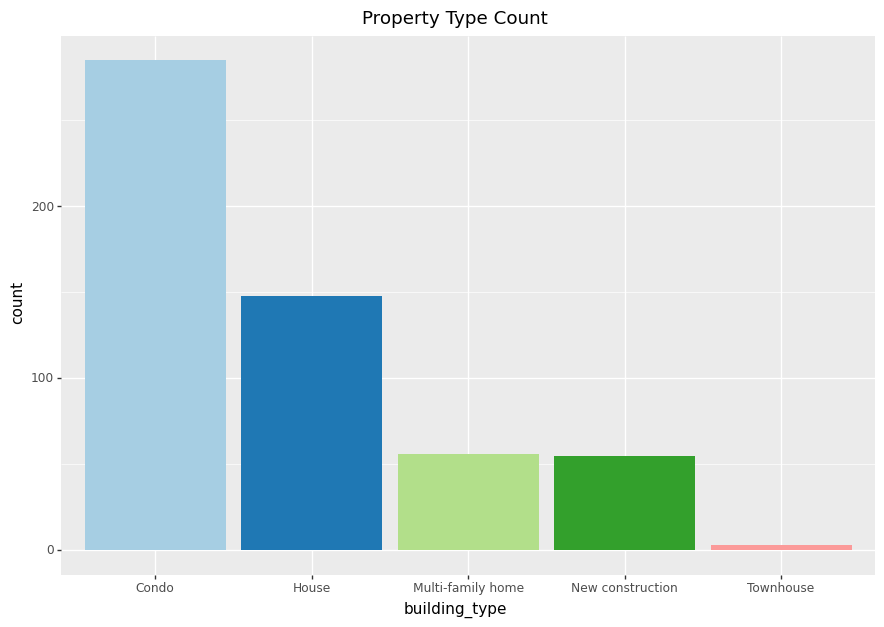

<ggplot: (302051982)>

In [17]:
# building type counts

p9.options.figure_size = (10.5, 7)
(ggplot(for_sale) 
    + geom_bar(aes(x='building_type', fill = 'building_type'), show_legend= False)
    + ggtitle('Property Type Count')
    + scale_fill_brewer(type='qual', palette= 3))

#### For Sale Listings By Zip Code

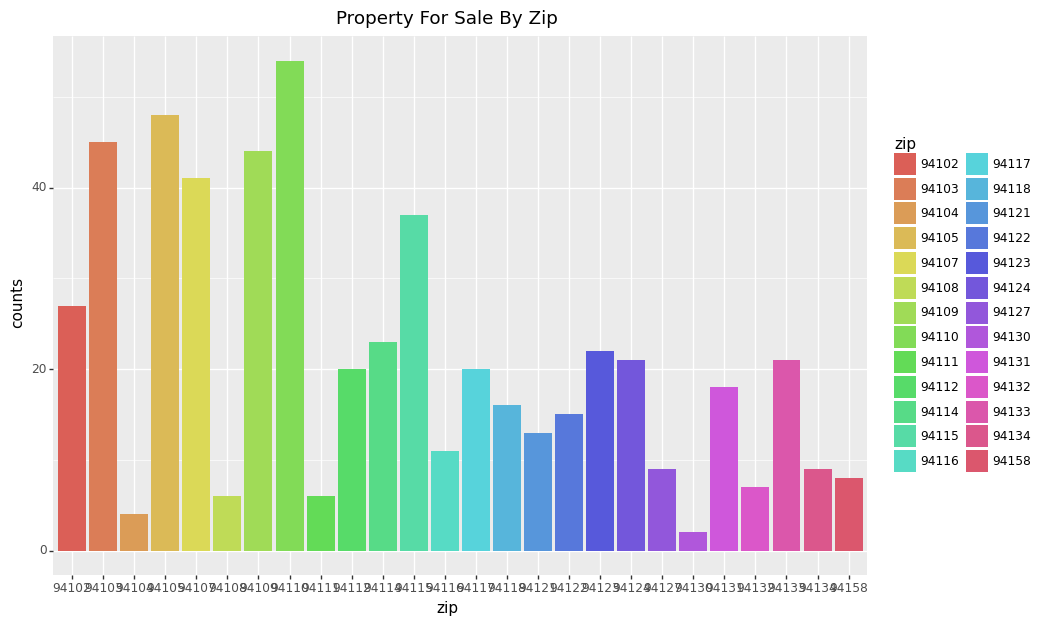

<ggplot: (301868159)>

In [18]:
fs_zip = for_sale['zip'].value_counts().rename_axis('zip').reset_index(name='counts')

(ggplot(fs_zip)
    + aes(x='zip',y = 'counts', fill = 'zip')
    + geom_bar(stat = 'identity')
    + ggtitle('Property For Sale By Zip'))

From this bar graph, we can clearly see that some zip codes have more listings than other zip codes. The zip code with the highest amount of listings is 94110, which corresponds to the Mission District. 

#### Average Listing Price By ZIP Code

In [19]:
# Average listing price by zip code

round(for_sale.groupby('zip').price.mean(),2)

zip
94102     841912.30
94103    1242138.49
94104     965750.00
94105    2758739.58
94107    1267219.02
94108    2429000.00
94109    2477597.09
94110    1788422.19
94111    1257415.83
94112    1250944.40
94114    2948815.22
94115    4504798.84
94116    1803000.00
94117    1867300.00
94118    4988562.50
94121    3452538.46
94122    1550125.87
94123    7037181.82
94124     829605.14
94127    2087055.56
94130    2549000.00
94131    2573296.50
94132    1330714.29
94133    3043190.48
94134    1145067.78
94158    1828001.00
Name: price, dtype: float64

In [20]:
# price column summary

for_sale['price'].describe().astype('int64')

count         547
mean      2376263
std       3335258
min        284045
25%        898500
50%       1390000
75%       2184250
max      29500000
Name: price, dtype: int64

The average listing price is 2,191,533 dollars, however the median listing price is 1,390,000. The difference between the median and mean is so large because of outliers that we find in the data. the most expensive listing for sale in San Francisco at the time is 29,500,000 dollars which is drastically more than the median listing price. 

#### Brokerage Listing Count

We can also take a look at the brokerage and listing agent data column. Here we can invetigate whether a certain brokerage or agent is dominating the SF real estate market.

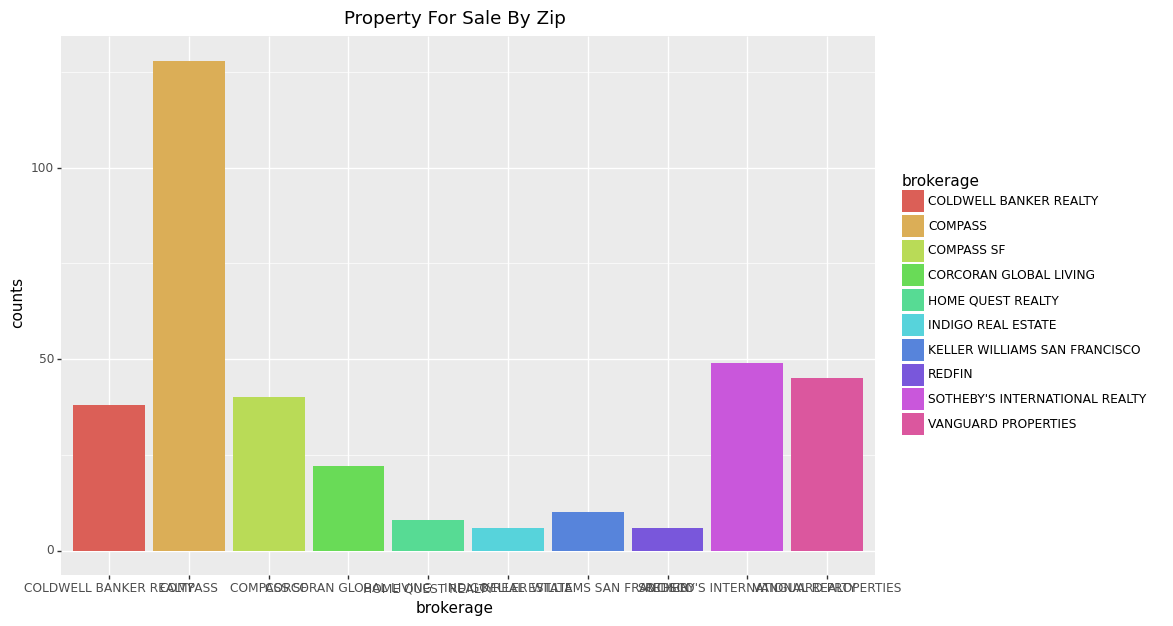

<ggplot: (302550643)>

In [21]:
# Number of properties by brokerage, top ten

broke_count = for_sale['brokerage'].value_counts().rename_axis('brokerage').reset_index(name='counts')

(ggplot(broke_count[:10])
    + aes(x='brokerage',y = 'counts', fill = 'brokerage')
    + geom_bar(stat= 'identity')
    + ggtitle('Property For Sale By Zip'))

In this bar graph, we are only looking at the ten brokerages with the most listings. Compass is by far the most dominant brokerage in San Francisco with over 150 listings. We can also note that there are two compass brokerages, one names Compass and the other named Compass SF. As a company, the compass chains dominate the SF real estate market on count. At about a third of the number of Compass listings, Vangaurd Properties and Sotheby's International Realty come in at second and third. 

#### Real Estate On Sale By Brokerage

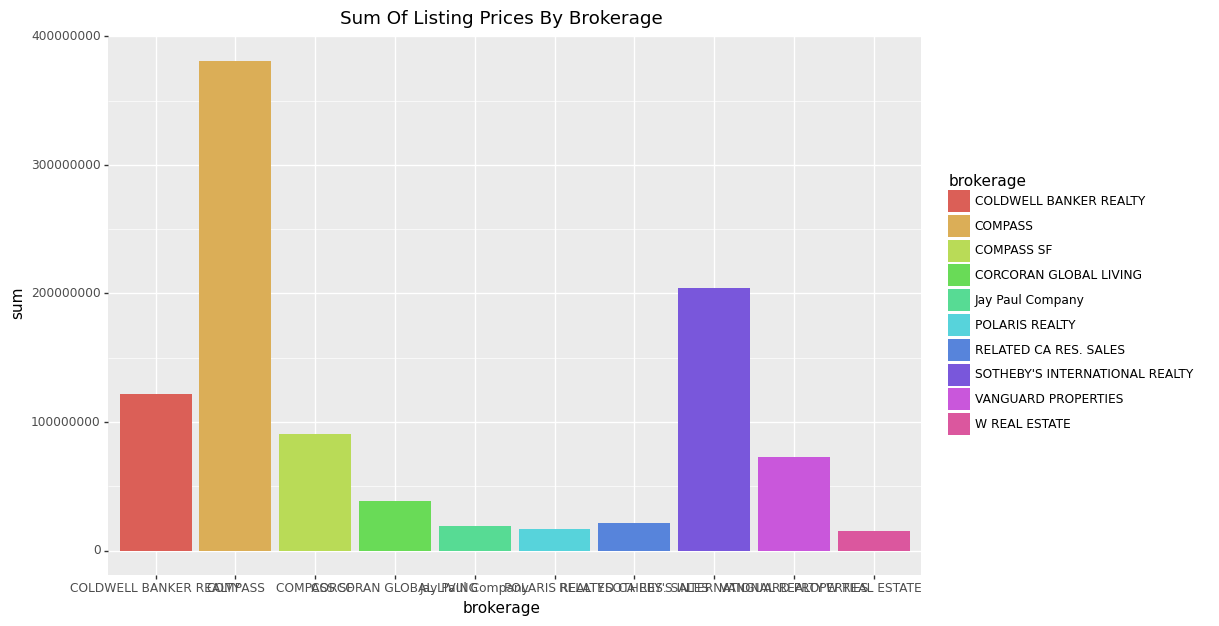

<ggplot: (302562392)>

In [22]:
# top ten amounts of real esate on sale by brokerage 

brokerage_sum = for_sale.groupby('brokerage').price.sum().rename_axis('brokerage').reset_index(name='sum') 
brokerage_sum = brokerage_sum.sort_values(['sum'], ascending = False)

(ggplot(brokerage_sum[:10])
    + aes(x='brokerage',y = 'sum', fill = 'brokerage')
    + geom_bar(stat = 'identity')
    + ggtitle('Sum Of Listing Prices By Brokerage'))

In [23]:
# average listing price by brokerage

pd.set_option('display.max_rows', 500)

brokerage_avg = for_sale.groupby('brokerage').price.mean().rename_axis('brokerage').reset_index(name='average_price')
brokerage_avg = brokerage_avg.sort_values(['average_price'], ascending = False)
brokerage_avg[:100]

,brokerage,average_price
63,Jay Paul Company,9.670000e+06
120,W REAL ESTATE,7.724500e+06
40,Frederick H. Meyer,7.350000e+06
86,PATRICIA AGUARISTI,7.200000e+06
100,RELATED CA RES. SALES,5.341250e+06
106,SOTHEBY'S INTERNATIONAL REALTY,4.164949e+06
93,Paramount Group,4.016667e+06
122,Wilson Meany/ Plant Construction,3.946000e+06
110,THE AGENCY,3.825000e+06
90,POLARIS REALTY,3.274400e+06


By taking a look at the top ten brokerages by the amount of real estate in dollars that they have on sale, we can see that Compass has the most real estate. This comes to no surprise as we have already found that they have a lot more listings by count than any other brokerage. We can also see that SOTHEBY has the second highest sum despite have far less listings. Diving deeper into the average listing prices by brokerage, we can see that Compass is no longer in the top ten with an average listing of 2,978,122 dollars, but SOTHEBY has an average lsiting price of 4,164,949 dollars.This partially explains why SOTHEBY comes second in total listing sum with drastically fewer listings. 

#### Agent Listing Count

We can also see which agent has the most listings.

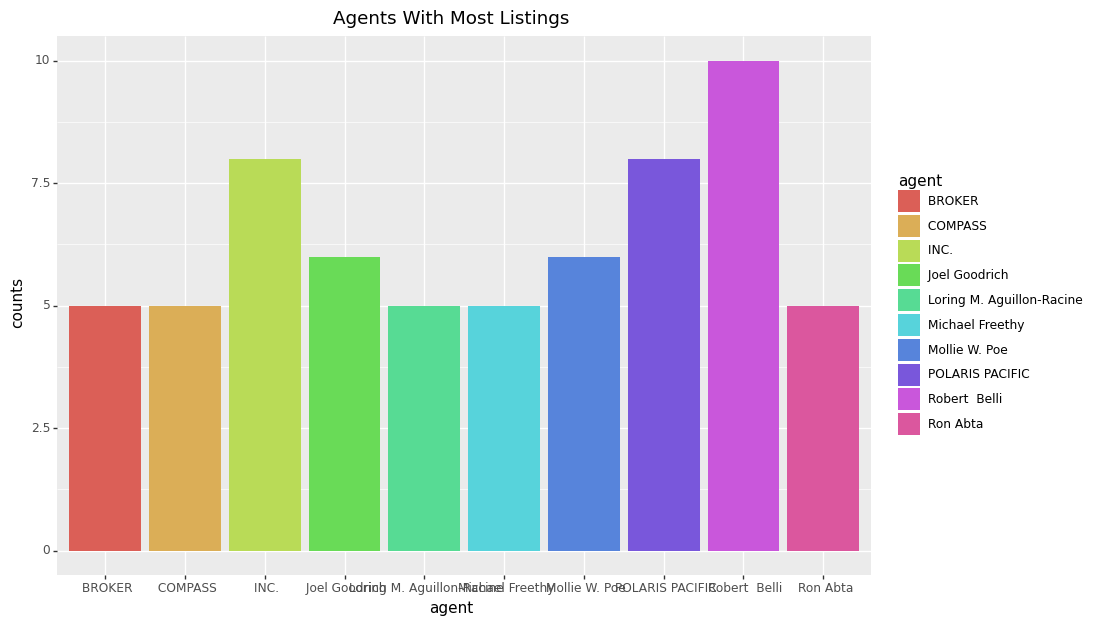

<ggplot: (302051892)>

In [24]:
agent_list= for_sale['agent'].value_counts().rename_axis('agent').reset_index(name='counts')
(ggplot(agent_list[:10])
    + aes(x='agent',y = 'counts', fill = 'agent')
    + geom_bar(stat = 'identity')
    + ggtitle('Agents With Most Listings'))

Currently the agent Robert Belli has the highest amount of listings with a count of 12 in San Francisco. 

#### Building Price vs Listing Price

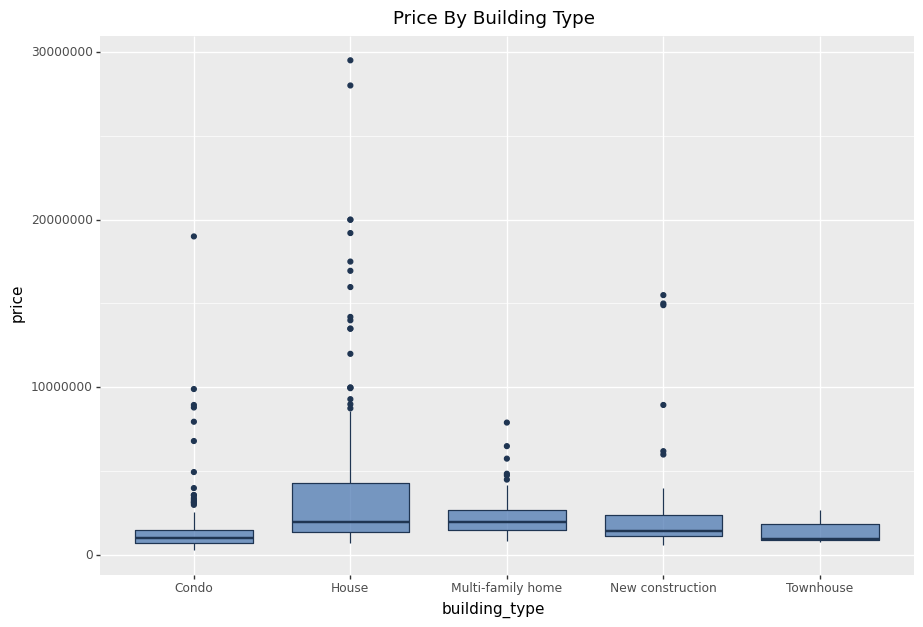

<ggplot: (302051943)>

In [25]:
(ggplot(data=for_sale)
    + aes(x='building_type',y='price')
    + geom_boxplot(colour="#1F3552", fill="#4271AE", alpha=0.7)
    + ggtitle("Price By Building Type"))

In [26]:
for_sale.groupby('building_type').price.mean().astype('int64')

building_type
Condo                1363768
House                4215911
Multi-family home    2398332
New construction     2698800
Townhouse            1482166
Name: price, dtype: int64

We can see from the boxplot that the houses and multifamily homes have almost the same median listing prices. However, the mean listing price for houses is over 4,215,911 while only 2,398,332 for multifamily. This is due to the extremely high outlier house listings that reach almost up to 30 million.

#### Price vs Zip

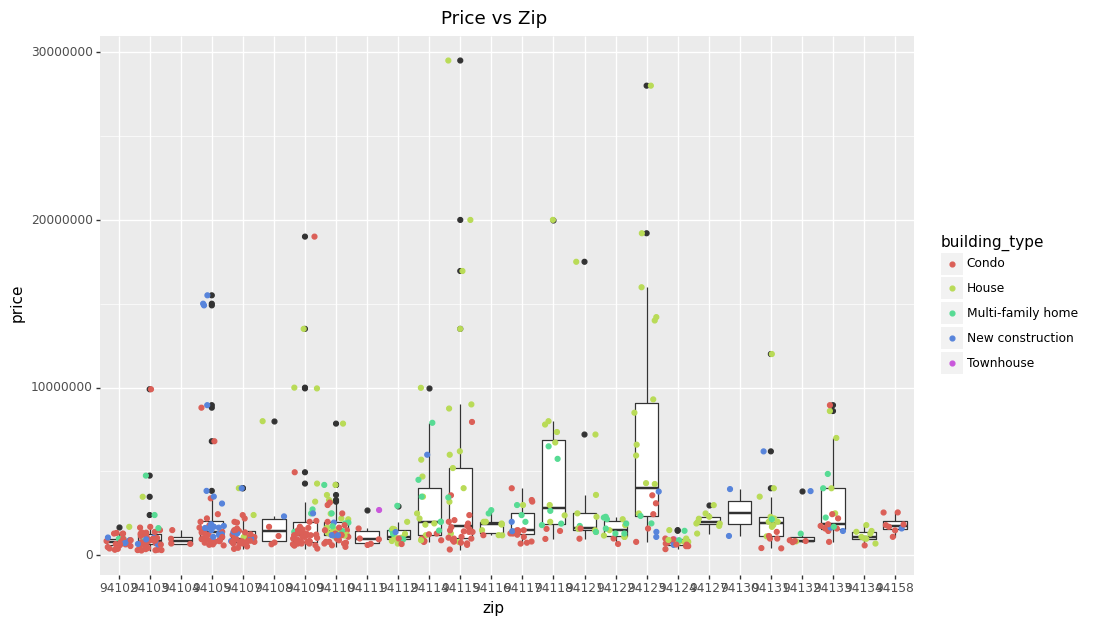

<ggplot: (303957291)>

In [37]:
# Does building type affect zip listing prices?
(ggplot(for_sale)
     + aes(x = 'zip', y = 'price')
     + geom_boxplot()
     + geom_jitter(aes(colour='building_type'))
     + ggtitle("Price vs Zip"))

We can see that the zip code 94123 had the highest average price for listing for sale on Zillow (and largest range for prices, which makes sense as this area borders the beach and neighbors the Golden Gate Bridge), followed by zip codes 94118 and 94130. We cannot tell with great certainty, but it looks like the zip codes with more condos on sale have the lower median listing prices.

#### Square Feet By Building Type

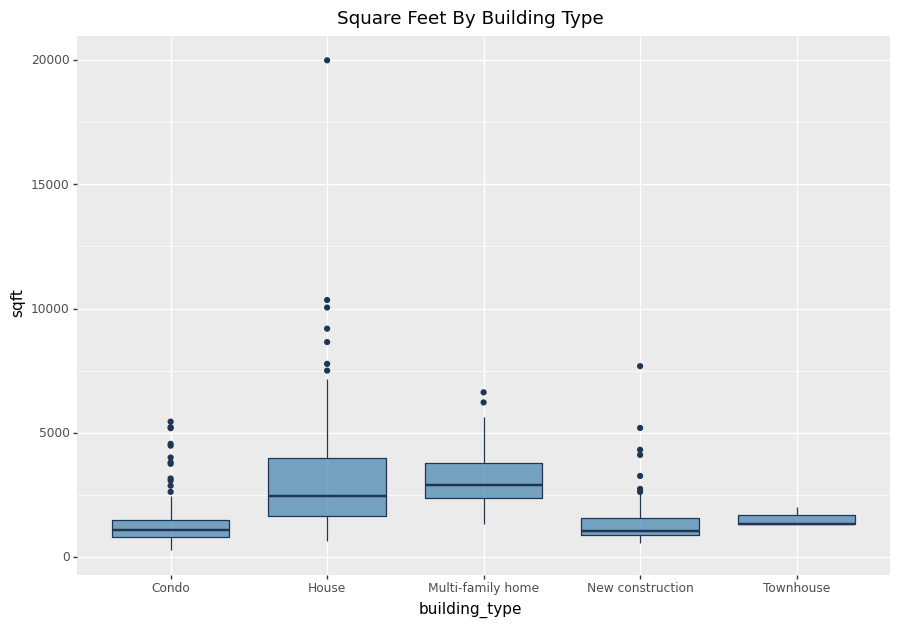

<ggplot: (303470556)>

In [28]:
(ggplot(for_sale)
    + aes(x='building_type',y='sqft')
    + geom_boxplot(colour="#1F3552", fill="#4281AE", alpha=0.7)
    + ggtitle("Square Feet By Building Type"))

In [29]:
# building type and sqft

for_sale.groupby('building_type').sqft.describe()

,count,mean,std,min,25%,50%,75%,max
building_type,,,,,,,,
Condo,285.0,1250.649123,750.746710,261.0,787.00,1090.0,1473.00,5445.0
House,148.0,3122.722973,2408.330722,640.0,1634.75,2444.0,3971.75,20000.0
Multi-family home,56.0,3165.214286,1169.558001,1324.0,2368.25,2910.0,3762.75,6625.0
New construction,55.0,1536.000000,1280.179472,568.0,878.00,1050.0,1551.00,7680.0
Townhouse,3.0,1553.000000,404.471260,1314.0,1319.50,1325.0,1672.50,2020.0


I find this boxplot and description of the data interesting because New Construction has less square footage on average than all building types but condos. This makes me think about how a lot of the new construction in San Francisco from what I have seen are tall buildings that have condos. Smaller square footage means more units per building. 

#### Price By # of Baths

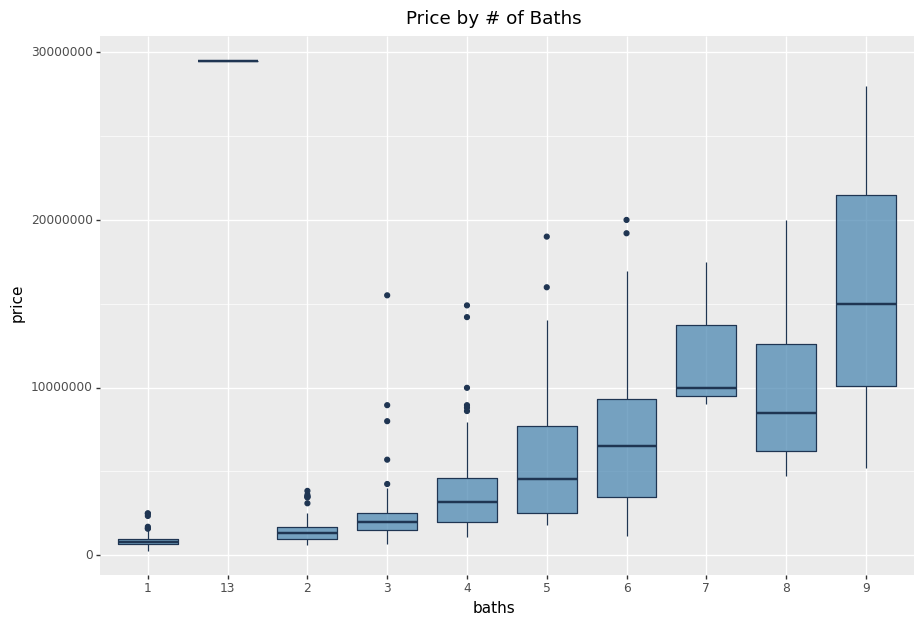

<ggplot: (303272325)>

In [35]:
(ggplot(for_sale)
    + aes(x=for_sale['baths'].astype(str), y='price')
    + geom_boxplot(colour="#1F3552", fill="#4281AE", alpha=0.7)
    + ggtitle("Price by # of Baths"))

#### Price By # of Beds

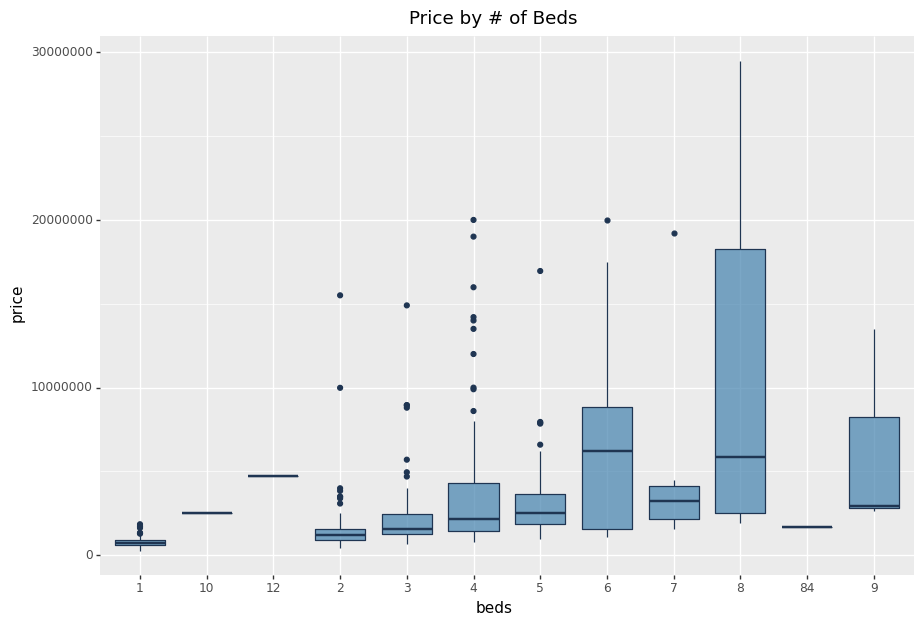

<ggplot: (302083220)>

In [36]:

(ggplot(for_sale)
    + aes(x=for_sale['beds'].astype(str),y='price', color='beds')
    + geom_boxplot(colour="#1F3552", fill="#4281AE", alpha=0.7)
     + p9.labs(title="Price by # of Beds"))

Price stadily increases as the number of beds increases. However, we can see that the number of baths gives a more aggressive increase in price. This is supported by our heatmap which shows price having a higher correlation with baths than with beds. 

#### Price Per Square Feet By Building Type

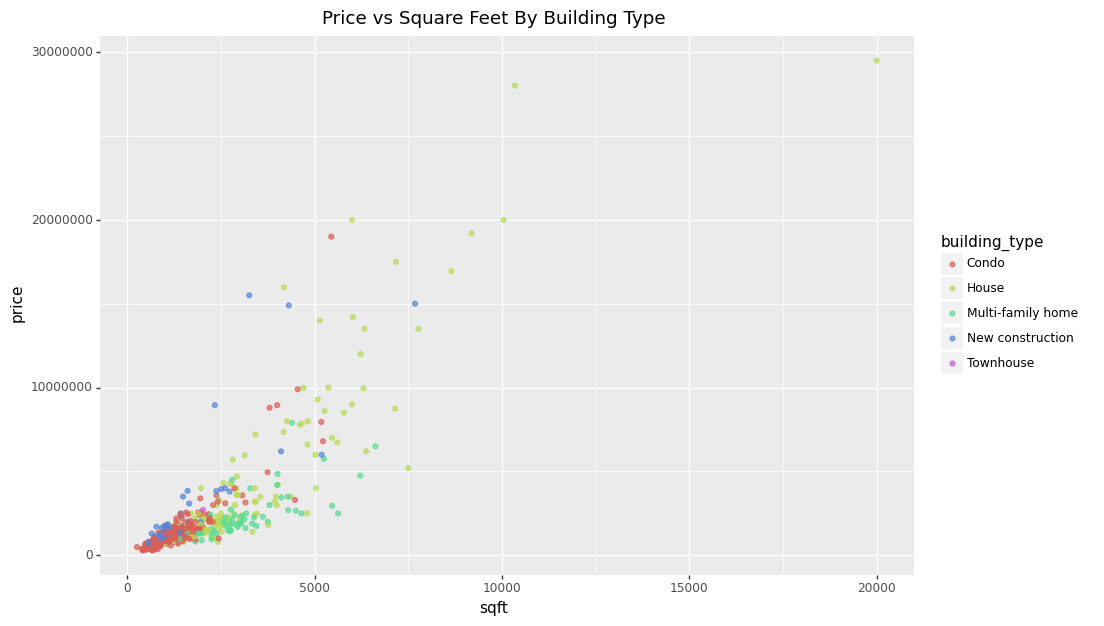

<ggplot: (302561103)>

In [32]:
(ggplot(data=for_sale, mapping=p9.aes(x='sqft', y='price', color='building_type'))
    + geom_point(alpha=0.7)
    + ggtitle("Price vs Square Feet By Building Type")
)

With this scatter plot, we can see that the new construction homes may have a higher price per square feet compared to other building types, as evident by the purple dots. Surprisingly, it looks like houses and mulit family homes are similarly priced. 

#### Heat Map

Text(0.5, 1.0, 'Correlation Between Features')

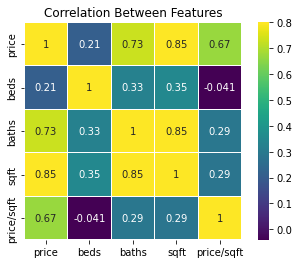

In [33]:
sns.heatmap(for_sale.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation Between Features')

In both listings that had sold and are currently for sale, we saw that square footage had the strongest correlation with a property's listing/sold at price. From this, it is apparent that prices for property listings in San Francisco is most affected by the total amount of square footage the property has, followed by the number of bathrooms, number of bedrooms, and lastly zip code.

#### Linear Regression

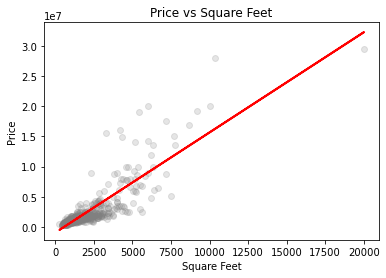

In [34]:
length = len(for_sale['price'])
x = for_sale[['sqft']]
y = for_sale[['price']]
reg = LinearRegression()
reg.fit(x,y)

plt.scatter(x, y,  color='grey', alpha =0.2)
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.title('Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

From our linear regression result by analyzing price vs sqft, we can see that there is a postitive realtionship between the two variables. This is supported by our heat map that indicates a correlation of 0.85 between the two variables

# V. Conclusion

From our findings, we saw that square footage had the most impact on the price of a property on Zillow.com in San Francisco in June 2021. We also saw that Zillow had more listings for sale from the 94110 zip code in San Francisco, which is located in the Inner Mission/Bernal Heights district. We also showed that San Francisco had more condos for sale than any other type of property, which makes sense with San Francisco's current dense neighborhoods.

It would be interesting to use this data to predict what the listing price of a home in San Francisco will be.

Some caveats to this approach would be that I did not compare it to a different year's housing market, such as prices for San Francisco listings before the COVID-19 pandemic, which had a major impact on the housing market. We were also limited to what Zillow had available on their website: 800 results per each search result (i.e. 800 listings San Francisco homes sold in the past month and 800 listings for homes currently for sale), and these search results only provided the aforementioned variables. For example, for the building type Townhouse, there were only three listings. I do not beleive that this is enough data to reach strong conclusions with ley alone used to model. It would be better if more data could be extracted. Such as lot size, garage info, pool info, HOA fee, and etc. This would allow us to better understand what influences housing price more and will allow deeper analysis to be conducted. 